**Nama : Muhammad Raihan Ekaputra Idrisatria**

**Asal : Universitas Brawijaya**

Tahap pertama yang akan dilakukan adalah mengimport modul yang dibutuhkan

In [2]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("/content/drive/MyDrive/File Program MBKM/Submisi_Tiga_Muhammad_Raihan_Ekaputra/Submisi_Tiga_2_Time_Series/weatherHistory.csv",parse_dates=['Formatted Date'])
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
t=df['Formatted Date'].values
T=df['Temperature (C)'].values

In [9]:
t_train,t_test,T_train,T_test=train_test_split(t,T,test_size=0.2,random_state=0,shuffle=False)

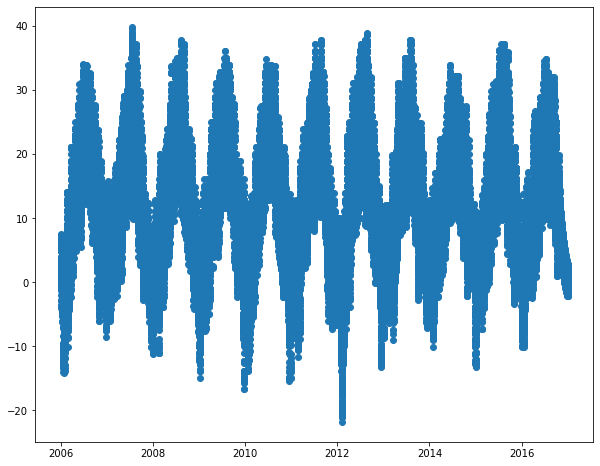

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(t,T)

In [11]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [12]:
train_set = windowed_dataset(T,window_size=60, batch_size=100, shuffle_buffer=1000)
test_set=windowed_dataset(T_test,window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60,return_sequences=True),
  tf.keras.layers.Dense(30,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(30,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1),
])

In [13]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1.0000e-04, momentum=0.9)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,validation_data=test_set,epochs=50,steps_per_epoch=10,callbacks=[my_callbacks])

Epoch 1/50
10/10 [==============================] - 17s 1s/step - loss: 13.9228 - mae: 14.4136 - val_loss: 12.0692 - val_mae: 12.5593
Epoch 2/50
10/10 [==============================] - 11s 1s/step - loss: 7.2471 - mae: 7.7222 - val_loss: 11.5449 - val_mae: 12.0348
Epoch 3/50
10/10 [==============================] - 12s 1s/step - loss: 6.0466 - mae: 6.5160 - val_loss: 10.6452 - val_mae: 11.1327
Epoch 4/50
10/10 [==============================] - 11s 1s/step - loss: 12.9564 - mae: 13.4439 - val_loss: 8.7714 - val_mae: 9.2559
Epoch 5/50
10/10 [==============================] - 11s 1s/step - loss: 9.2396 - mae: 9.7254 - val_loss: 6.4438 - val_mae: 6.9243
Epoch 6/50
10/10 [==============================] - 12s 1s/step - loss: 5.7795 - mae: 6.2595 - val_loss: 4.8305 - val_mae: 5.3058
Epoch 7/50
10/10 [==============================] - 11s 1s/step - loss: 4.4044 - mae: 4.8809 - val_loss: 4.4917 - val_mae: 4.9684
Epoch 8/50
10/10 [==============================] - 12s 1s/step - loss: 5.1024 -

Menghitung skala data

In [15]:
skala_data=max(T)-min(T)
skala_data

61.727777777777774

In [17]:
(4.5/skala_data)*100

7.290072900729008

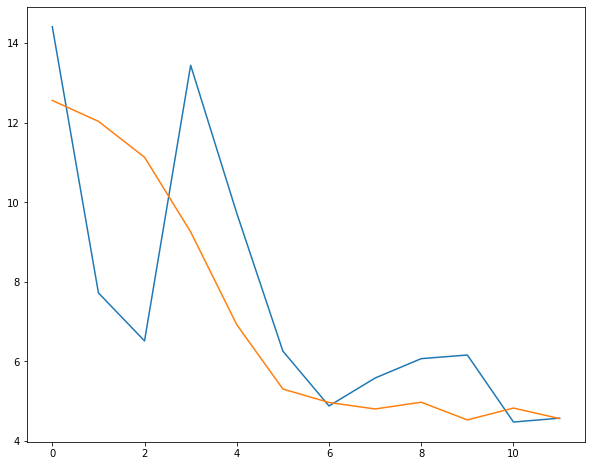

In [23]:
plt.figure(figsize=(10,8))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

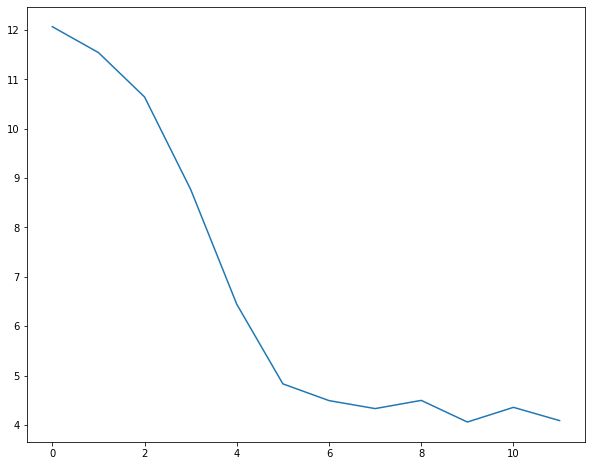

In [24]:
plt.figure(figsize=(10,8))
plt.plot(history.history['val_loss'])